# **Exemplo Grafo de Conhecimento baseado num Arbol Genealogico usando networkx**

### Autor: Laura M. Parra
Data inicio: 24/01/2024

Data atualização: 26/01/2024

Este código crea un grafo dirigido utilizando NetworkX y representa un árbol genealógico simple con un abuelo y una abuela en cada lado, un padre y una madre, y un hijo.
Es posible personalizar y ampliar este código según tus necesidades y la complejidad de tu árbol genealógico. La visualización del grafo se realiza con Matplotlib.

Links recomendados para estudiar:
- https://diegomariano.com/networkx/
- https://youtu.be/gvQ-sJblYDA?si=KGW7Jf46LR4uBqNs
- Biblioteca networkx

In [1]:
pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def agregar_persona(grafo, persona, padre=None, madre=None, pareja=None):
    grafo.add_node(persona)
    if padre:
        grafo.add_edge(padre, persona)
    if madre:
        grafo.add_edge(madre, persona)
    if pareja:
        grafo.add_edge(persona, pareja)

arbol_genealogico = nx.DiGraph()

# Agregar personas al grafo
agregar_persona(arbol_genealogico, "Agapito")
agregar_persona(arbol_genealogico, "María Garcia")
agregar_persona(arbol_genealogico, "Gerardo Parra", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Alfonso", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Hernando", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Carlos", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Ines", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Elisa", "Agapito", "María Garcia")
agregar_persona(arbol_genealogico, "Josefina")
agregar_persona(arbol_genealogico, "Marco Tulio")

agregar_persona(arbol_genealogico, "Luis Carlos", "Carlos", "Lilia")
agregar_persona(arbol_genealogico, "Gerardito", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Raul", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Gladys", "Gerardo Parra", "Clarisa")
agregar_persona(arbol_genealogico, "Bertha", "Gerardo Parra", "Clarisa")

agregar_persona(arbol_genealogico, "Jaydith", "Marco Tulio", "Josefina")
agregar_persona(arbol_genealogico, "Laura", "Gerardito", "Jaydith")
agregar_persona(arbol_genealogico, "Carolita", "Gerardito", "Jaydith")
agregar_persona(arbol_genealogico, "Luis Carlos Jr.", "Luis Carlos", "Mom")

# Agregar y definir parejas en el grafo
agregar_persona(arbol_genealogico, "Jaydith", pareja="Gerardito")
agregar_persona(arbol_genealogico, "Clarisa", pareja="Gerardo Parra")
agregar_persona(arbol_genealogico, "Agapito", pareja="María Garcia")
agregar_persona(arbol_genealogico, "Mom", pareja="Luis Carlos")
agregar_persona(arbol_genealogico, "Carlos", pareja="Lilia")

# Definir posiciones manuales para ciertos nodos
posiciones_manuales = {
    # Nivel 1
    "Agapito": (-1.5, 0),
    "María Garcia": (0.5, 0),


    # Nivel 2
    "Gerardo Parra": (0, -1), "Clarisa": (-1,-1.5),
    "Alfonso": (-1, -1),
    "Hernando": (1, -1),
    "Carlos": (2, -1), "Lilia": (1, -1.5),
    "Ines": (-2, -1),
    "Elisa": (-3, -1),
    "Josefina": (-2, -1.5),
    "Marco Tulio": (-3, -1.5),

  # Nivel 3

    "Luis Carlos": (3, -1.5),  "Mom": (4,-1.5),
    "Gerardito": (0, -2), "Jaydith": (-2, -2),
    "Raul": (1, -2),
    "Gladys": (2, -2),
    "Bertha": (3, -2),

   # Nivel 4
    "Laura": (-1, -3),
    "Carolita": (0, -3),
    "Luis Carlos Jr.": (4, -2),
}

### ***Mejorar Visualización del Grafo***

* Para lograr un salto de línea en los nodos con nombres más largos se puede utilizar el atributo `label` en `nx.draw_networkx_labels`. Esto permitirá personalizar el texto de las etiquetas y agregar saltos de línea donde sea necesario.

* Además es importante recordar que es un grafo que representa un arbol genealogico, por esta razon se debe visualizar como tal. Para esto se utilizaron etiquetas y posiciones manuales para cumplir con este objetivo.

* Fue utilizado el parámetro `arrowstyle` en `nx.draw_networkx_edges` para cambiar el tipo de flecha de las parejas. Se pueden ajustar los parámetros `connectionstyle` y `arrowstyle` según la necesidad del proyecto.

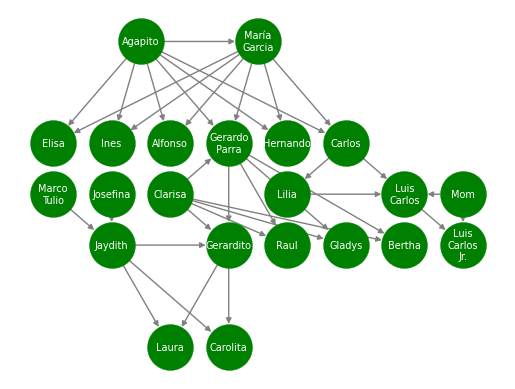

In [3]:
# Obtener nodos de parejas
nodos_parejas = [nodo for nodo, datos in arbol_genealogico.nodes(data=True) if "pareja" in datos]

# Agregar etiquetas con saltos de línea para nodos con nombres largos
etiquetas = {nodo: nodo.replace(" ", "\n") for nodo in arbol_genealogico.nodes}
nx.draw_networkx_labels(arbol_genealogico, pos=posiciones_manuales, labels=etiquetas, font_size=7, font_color='white')

# Colorear nodos de parejas en otro color
nx.draw_networkx_nodes(arbol_genealogico, pos=posiciones_manuales, nodelist=nodos_parejas, node_color='red')

# Cambiar el color de flecha de las parejas
for edge in arbol_genealogico.edges(data=True):
    if "pareja" in edge[2]:
        nx.draw_networkx_edges(arbol_genealogico, pos=posiciones_manuales, edgelist=[(edge[0], edge[1])], connectionstyle="arc3,rad=0.1", arrowsize=0, arrowstyle="->,head_width=0.5,head_length=0.7", edge_color='red')

# Visualización con posiciones manuales y colores
nx.draw(arbol_genealogico, pos=posiciones_manuales, with_labels=False, arrowsize=8, labels=etiquetas, node_size=1100, font_size=8, edge_color='gray', linewidths=0.2, node_color='green') #, font_weight='bold'
